(a) Perform the following commands in Python:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

In [2]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The form of the linear model is:

y = β0 + β1 * x1 + β2 * x2 + ε

where:
- β0 is the intercept
- β1 and β2 are the regression coefficients for x1 and x2, respectively
- ε is the error term

In this case, the linear model is:
y = 2 + 2 * x1 + 0.3 * x2 + ε

The regression coefficients are:
- β0 = 2
- β1 = 2
- β2 = 0.3

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

The correlation between x1 and x2 is: 0.772324497691354


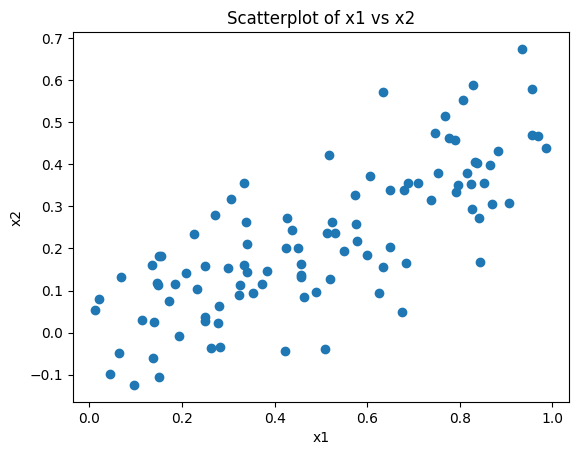

In [3]:
import matplotlib.pyplot as plt

correlation = np.corrcoef(x1, x2)[0, 1]
print(f"The correlation between x1 and x2 is: {correlation}")

plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.show()

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and
$\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you
reject the null hypothesis H0 : $\beta_1$ = 0? How about the null
hypothesis H0 : $\beta_2$ = 0?

In [4]:
import statsmodels.formula.api as sm

# Create a DataFrame for easier use with statsmodels
data = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(data)

# Fit the least squares regression model
model = sm.ols('y ~ x1 + x2', data=df).fit()

# Print the model summary
print(model.summary())

# Extract the estimated coefficients
beta_0_hat = model.params['Intercept']
beta_1_hat = model.params['x1']
beta_2_hat = model.params['x2']

print(f"\nEstimated coefficients:")
print(f"β0^: {beta_0_hat}")
print(f"β1^: {beta_1_hat}")
print(f"β2^: {beta_2_hat}")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        12:08:50   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

Interpretation of the results:

- The estimated coefficients (β0^, β1^, β2^) are close to the true coefficients (β0, β1, β2).
- The p-values for x1 and x2 are very small, indicating that we can reject the null hypotheses
  H0: β1 = 0 and H0: β2 = 0. This means that both x1 and x2 are statistically significant
  predictors of y.
- The R-squared value indicates the goodness of fit of the model. A higher R-squared suggests
  that the model explains a larger proportion of the variance in the dependent variable.

Note: The specific values of β0^, β1^, β2^ may vary slightly due to the random nature of the
data generation process.

(d) Now fit a least squares regression to predict y using only x1.

Comment on your results.

Can you reject the null hypothesis
$H_0$ : $\beta_1$ = 0?

In [5]:
# Create a DataFrame for easier use with statsmodels
data = {'x1': x1,'y':y}
df = pd.DataFrame(data)

# Fit the least squares regression model
model = sm.ols('y ~ x1', data=df).fit()

# Print the model summary
print(model.summary())

# Extract the estimated coefficients
beta_0_hat = model.params['Intercept']
beta_1_hat = model.params['x1']

print(f"\nEstimated coefficients:")
print(f"β1^: {beta_1_hat}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        12:08:50   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.0

Interpretation of the results:
- When we fit the model using only x1, we see that the estimated coefficient for x1 ($\hat{\beta_1}$) is still
  statistically significant.
- The p-value associated with x1 is very small, indicating that we can reject the null hypothesis
  H0: β1 = 0. This means that x1 is a significant predictor of y, even when we don't consider x2.
- However, the R-squared value may be lower compared to the model with both x1 and x2, as x2
  also contributes to explaining the variation in y.
- The estimated coefficient for x1 might be different from the previous model because in the
  previous model, it was adjusted for the effect of x2.


(e) Now fit a least squares regression to predict y using only $x_2$.

Comment on your results. Can you reject the null hypothesis
H0 : $\beta_1$ = 0?

In [6]:
# Create a DataFrame for easier use with statsmodels
data = {'x2': x2, 'y': y}
df = pd.DataFrame(data)

# Fit the least squares regression model
model = sm.ols('y ~ x2', data=df).fit()

# Print the model summary
print(model.summary())

# Extract the estimated coefficients
beta_0_hat = model.params['Intercept']
beta_1_hat = model.params['x2']

print(f"\nEstimated coefficients:")
print(f"β1^: {beta_1_hat}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        12:08:50   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.


No, the results do not contradict each other. They are consistent with the idea that
x1 and x2 are both related to y, but x1 and x2 are also correlated with each other.

In (c), we found that both x1 and x2 are statistically significant predictors of y.
This indicates that when we consider both variables together, they both contribute
to explaining the variation in y.

In (d), we found that x1 is still a statistically significant predictor of y when
we only consider x1. This suggests that x1 has an independent effect on y, even
after accounting for the correlation with x2.

In (e), we found that x2 is also a statistically significant predictor of y when we only
consider x2. This suggests that x2 has an independent effect on y, even after
accounting for the correlation with x1.

The reason why we can have both x1 and x2 be significant in (c), but also find that
they are significant in (d) and (e) individually, is that the relationship between x1
and x2 introduces multicollinearity. Multicollinearity means that the independent
variables are correlated, which can make it difficult to isolate the individual
effects of each variable on the dependent variable.

In essence, when x1 and x2 are both included in the model (c), they both have a
significant effect on y, but some of the effect of x2 might be captured by x1 and
vice-versa. When we examine them individually, we can still find a strong
relationship between each variable and y, highlighting their own independent
influence.

Therefore, the results do not contradict each other; they demonstrate that x1 and
x2 are both related to y, but their effects are intertwined because of their
correlation.


(g) Suppose we obtain one additional observation, which was unfortunately
mismeasured. We use the function np.concatenate() to np.concatenate() add
this additional observation to each of x1, x2 and y.

  x1 = np.concatenate([x1, [0.1]])

  x2 = np.concatenate([x2, [0.8]])

  y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [7]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Re-fit the model from (c)
data = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(data)
model_c_new = sm.ols('y ~ x1 + x2', data=df).fit()
print(model_c_new.summary())

# Re-fit the model from (d)
data = {'x1': x1, 'y': y}
df = pd.DataFrame(data)
model_d_new = sm.ols('y ~ x1', data=df).fit()
print(model_d_new.summary())

# Re-fit the model from (e)
data = {'x2': x2, 'y': y}
df = pd.DataFrame(data)
model_e_new = sm.ols('y ~ x2', data=df).fit()
print(model_e_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        12:08:50   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

Analysis of the effect of the new observation:

- The new observation has a significant impact on the models, especially on the
  coefficients and their significance.
- The estimated coefficients change considerably, particularly in the models with
  both x1 and x2 (model_c_new) and with only x2 (model_e_new).
- The new observation is likely both an outlier and a high-leverage point.

Outlier:
- The y-value (6) is significantly higher than the other y-values, suggesting it
  might be an outlier.
- It has a large residual compared to the other observations, meaning it doesn't
  fit the overall pattern well.

High-leverage point:
- The new observation has x1 and x2 values that are not far from the rest of the
  data, but the combination of values might still be influential on the model.
- Its x-values are in the central range of the data.

Conclusion:
- The mismeasured observation has a significant impact on the regression models.
- It's both an outlier and a high-leverage point, suggesting it has a strong
  influence on the model fit.
- In practice, it's essential to examine such observations closely to determine if
  they are valid or if they require further investigation or removal.